In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
test = pd.read_csv(r'C:\Users\Admin\Desktop\pricetest.csv')
train = pd.read_csv(r'C:\Users\Admin\Desktop\pricetrain.csv')

In [ ]:
sample_submission=pd.read_csv(r'C:\Users\Admin\Desktop\sample_submission.csv')

##### Checking the Target Variable

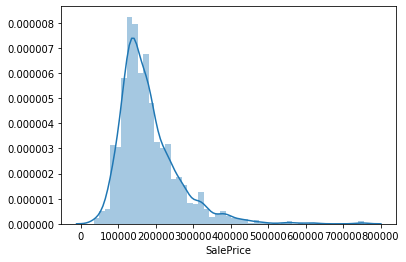

In [3]:
sns.distplot(train.SalePrice)

###### data is rightly skewed hence Transforming it

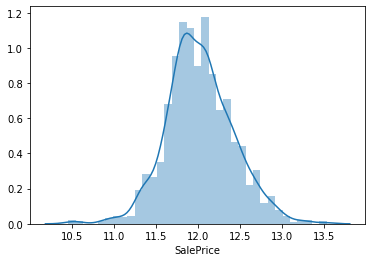

In [4]:
sns.distplot(np.log(train.SalePrice + 1))

##### visualizing\checking null values for both train and test by combining them

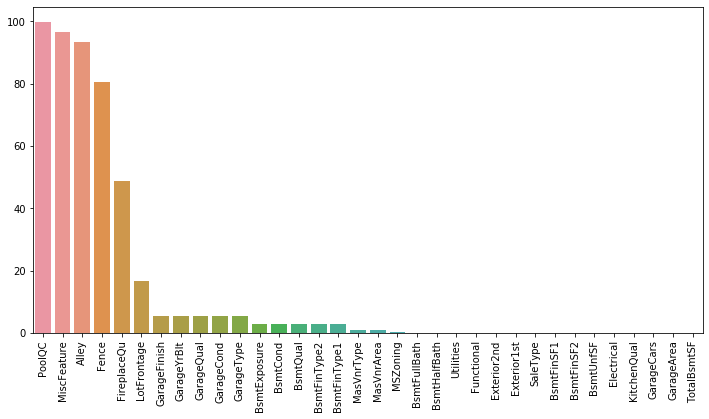

In [5]:
data = pd.concat((train.drop(["SalePrice"], axis=1), test))
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=data_na.index, y=data_na)

In [6]:
data[data.PoolArea != 0][["PoolArea", "PoolQC"]]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
514,144,Ex
960,368,NaN
1043,444,NaN


######  MiscFeature can be deleted, as miscfeature has too many missing values 

In [7]:
data[data.MiscVal > 10000][["MiscFeature", "MiscVal"]]

,MiscFeature,MiscVal
346,Gar2,15500
1,Gar2,12500
1089,NaN,17000


In [8]:
data[(data.GarageType.notnull()) & (data.GarageYrBlt.isnull())][["Neighborhood", "YearBuilt", "YearRemodAdd", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]

,Neighborhood,YearBuilt,YearRemodAdd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,OldTown,1910,1983,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,IDOTRR,1923,1999,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train.loc[[332, 948]][["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,1,0
948,Gd,TA,NaN,Unf,0,Unf,0,936,0,0


In [10]:
test.loc[[27, 580, 725, 757, 758, 888, 1064]][["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,0.0,0.0
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1.0,0.0
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,0.0,1.0
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,0.0,0.0
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,0.0,0.0


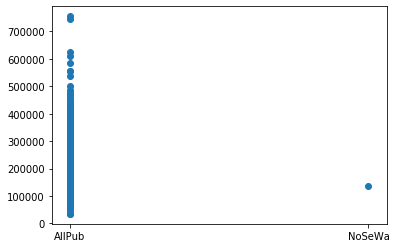

In [11]:
plt.scatter(train.Utilities, train.SalePrice)

##### feature engineering

###### 1.correcting SalePrice with a simple log transformation.

In [12]:
y = train["SalePrice"]
y = np.log(y+1)

###### 2. Missing values filling

In [13]:
# PoolQC
test.loc[960, "PoolQC"] = "Fa"
test.loc[1043, "PoolQC"] = "Gd"
test.loc[1139, "PoolQC"] = "Fa"
 
# Garage
test.loc[666, "GarageYrBlt"] = 1979
test.loc[1116, "GarageYrBlt"] = 1979
 
test.loc[666, "GarageFinish"] = "Unf"
test.loc[1116, "GarageFinish"] = "Unf"
 
test.loc[1116, "GarageCars"] = 2
test.loc[1116, "GarageArea"] = 480
 
test.loc[666, "GarageQual"] = "TA"
test.loc[1116, "GarageQual"] = "TA"
 
test.loc[666, "GarageCond"] = "TA"
test.loc[1116, "GarageCond"] = "TA"

###### 3. Missing values filling

In [14]:
# PoolQC
train = train.fillna({"PoolQC": "None"})
test = test.fillna({"PoolQC": "None"})
 
# Alley
train = train.fillna({"Alley": "None"})
test = test.fillna({"Alley": "None"})
 
# FireplaceQu
train = train.fillna({"FireplaceQu": "None"})
test = test.fillna({"FireplaceQu": "None"})
 
# LotFrontage
train = train.fillna({"LotFrontage": 0})
test = test.fillna({"LotFrontage": 0})
 
# Garage
train = train.fillna({"GarageType": "None"})
test = test.fillna({"GarageType": "None"})
train = train.fillna({"GarageYrBlt": 0})
test = test.fillna({"GarageYrBlt": 0})
train = train.fillna({"GarageFinish": "None"})
test = test.fillna({"GarageFinish": "None"})
test = test.fillna({"GarageCars": 0})
test = test.fillna({"GarageArea": 0})
train = train.fillna({"GarageQual": "None"})
test = test.fillna({"GarageQual": "None"})
train = train.fillna({"GarageCond": "None"})
test = test.fillna({"GarageCond": "None"})
 
# Bsmt
train = train.fillna({"BsmtQual": "None"})
test = test.fillna({"BsmtQual": "None"})
train = train.fillna({"BsmtCond": "None"})
test = test.fillna({"BsmtCond": "None"})
train = train.fillna({"BsmtExposure": "None"})
test = test.fillna({"BsmtExposure": "None"})
train = train.fillna({"BsmtFinType1": "None"})
test = test.fillna({"BsmtFinType1": "None"})
train = train.fillna({"BsmtFinSF1": 0})
test = test.fillna({"BsmtFinSF1": 0})
train = train.fillna({"BsmtFinType2": "None"})
test = test.fillna({"BsmtFinType2": "None"})
test = test.fillna({"BsmtFinSF2": 0})
test = test.fillna({"BsmtUnfSF": 0})
test = test.fillna({"TotalBsmtSF": 0})
test = test.fillna({"BsmtFullBath": 0})
test = test.fillna({"BsmtHalfBath": 0})
 
# MasVnr
train = train.fillna({"MasVnrType": "None"})
test = test.fillna({"MasVnrType": "None"})
train = train.fillna({"MasVnrArea": 0})
test = test.fillna({"MasVnrArea": 0})
 
# MiscFeature,Fence,Utilities
train = train.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
test = test.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
 
# other
test = test.fillna({"MSZoning": "RL"})
test = test.fillna({"Exterior1st": "VinylSd"})
test = test.fillna({"Exterior2nd": "VinylSd"})
train = train.fillna({"Electrical": "SBrkr"})
test = test.fillna({"KitchenQual": "TA"})
test = test.fillna({"Functional": "Typ"})
test = test.fillna({"SaleType": "WD"})

###### 4.Explore outliers and delete

In [15]:
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [16]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

##### Used Ridge to find outliers

In [17]:
rid = Ridge(alpha=10)
rid.fit(train_dummies, y)
np.sqrt(-cross_val_score(rid, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.1388301732996234

In [18]:
y_pred = rid.predict(train_dummies)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers1

array([  30,   88,  142,  277,  308,  328,  365,  410,  438,  462,  495,
        523,  533,  581,  588,  628,  632,  681,  688,  710,  714,  728,
        774,  812,  874,  898,  916,  935,  968,  970, 1062, 1168, 1170,
       1181, 1182, 1298, 1324, 1383, 1423, 1432, 1453], dtype=int64)

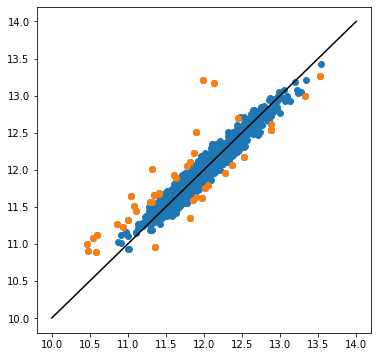

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outliers1], y_pred[outliers1])
plt.plot(range(10, 15), range(10, 15), color="black")

In [20]:
outliers = []
for i in outliers1:
    outliers.append(i)
outliers

[30,
 88,
 142,
 277,
 308,
 328,
 365,
 410,
 438,
 462,
 495,
 523,
 533,
 581,
 588,
 628,
 632,
 681,
 688,
 710,
 714,
 728,
 774,
 812,
 874,
 898,
 916,
 935,
 968,
 970,
 1062,
 1168,
 1170,
 1181,
 1182,
 1298,
 1324,
 1383,
 1423,
 1432,
 1453]

##### Delete outliers

In [21]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [22]:
train = train.drop([30, 88, 142, 277, 328, 410, 462, 495, 523, 533, 581, 588, 628, 632, 681, 688, 710, 714, 728, 774, 812, 874, 898, 916, 968, 970, 1181, 1182, 1298, 1324, 1383, 1423, 1432, 1453])
y = train["SalePrice"]
y = np.log(y+1)

#### MODEL BUILDING

In [23]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

###### Modeling Using GBDT, XGBOOST, Lasso, Ridge, and combined them later

##### gradient

In [24]:
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=150)
gbr.fit(train_dummies, y)
np.sqrt(-cross_val_score(gbr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.10046044933614964

##### XGBOOST

In [25]:
xgbr = XGBRegressor(max_depth=5, n_estimators=400)
xgbr.fit(train_dummies, y)
np.sqrt(-cross_val_score(xgbr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.10792060364460862

#### LASSO

In [26]:
lasso = Lasso(alpha=0.00047)
lasso.fit(train_dummies, y)
np.sqrt(-cross_val_score(lasso, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.09072389427316194

##### RIDGE

In [27]:
rid = Ridge(alpha=13)
rid.fit(train_dummies, y)
np.sqrt(-cross_val_score(rid, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.09161386485828474

###### ENSEMBLE/COMBINED MODEL

In [28]:
train_predict = 0.1 * gbr.predict(train_dummies) + 0.3 * xgbr.predict(train_dummies) + 0.3 * lasso.predict(train_dummies) + 0.3 * rid.predict(train_dummies)

###### Manually modify the predicted value

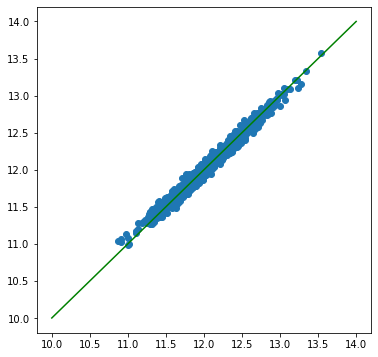

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="green")

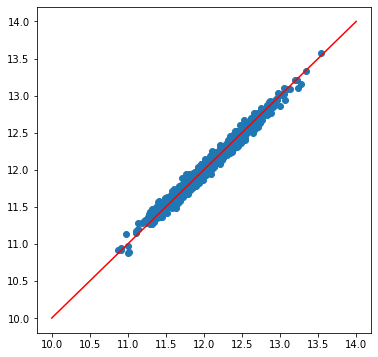

In [30]:
q1 = pd.DataFrame(train_predict).quantile(0.0042)
pre_df = pd.DataFrame(train_predict)
pre_df["SalePrice"] = train_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.99
train_predict = np.array(pre_df.SalePrice)
plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

##### Prediction

In [31]:
test_predict = 0.1 * gbr.predict(test_dummies) + 0.3 * xgbr.predict(test_dummies) + 0.3 * lasso.predict(test_dummies) + 0.3 * rid.predict(test_dummies)
q1 = pd.DataFrame(test_predict).quantile(0.0042)
pre_df = pd.DataFrame(test_predict)
pre_df["SalePrice"] = test_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.96

In [32]:
test_predict = np.array(pre_df.SalePrice)
sample_submission["SalePrice"] = np.exp(test_predict)-1
###sample_submission.to_csv("output11.csv", index=False)

NameError: name 'sample_submission' is not defined